In [ ]:
#Import the Libraries 
from textblob import TextBlob, Word, Blobber
from wordcloud import WordCloud 
import tweepy
import pandas as pd
import numpy as np 
import re
import matplotlib.pyplot as plt
import json

In [ ]:
file_path= "/content/drive/MyDrive/Colab Notebooks/humming-birds/config.json"
with open(file_path) as fp:
  config = json.loads(fp.read())

print(config['KEY'])

1Mm1HogZSqkaHkS9xTEgCXFmL


In [ ]:
# Twitter Api Cred.
key = (config['KEY'])
secret = (config['SECRET'])
bear= (config['BEAR'])
token= (config['ACC_TOKE'])
token_secr= (config['ACC_SECR'])

In [ ]:
#Creating the auth object
auth = tweepy.OAuthHandler(key, secret)
#Setting token and access secret 
auth.set_access_token(token, token_secr)
#Creating the api call 
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
#Testing Tweet call
post = api.user_timeline(screen_name= "KimKardashian", count = 100, lang= "en", tweet_mode = "extended")


In [ ]:
#Print 10 tweets
i = 1
print("Showing the 10 most recent tweets: \n")
for tweet in post [0:10]:
  print( str(i) + ")" + tweet.full_text + "\n")
  i = i +1

Showing the 10 most recent tweets: 

1)Just dropped @SKIMS After Hours! Shop now in 13 styles and 5 shades now at https://t.co/Qsy51SlAHL https://t.co/EQ0dggffQ1

2)@TravisWhite Happy Birthday boo! Love you 😘

3)Thank you for always guiding and protecting all of us. Definitely celebrating you today dad. I miss you soooooo much.

4)Birthday selfie with my dad! 
We took this pic on this day celebrating his birthday at the Armenian restaurant in 1998. 
Born on 2.22.44 and today it’s the angel number 2.22.22. I definitely feel the angels all around and feel you all the time. ♾ https://t.co/x95ZXCfqir

5)Good luck to everyone taking the bar tomorrow. I know you’ve got this!

6)Duh https://t.co/JmJtrMETsA

7)I don’t think so lol https://t.co/TGmeHrQftj

8)Who saw The Kardashian’s trailer during The Bachelor????

9)Side-by-side or miles apart sisters are always connected at heart https://t.co/6IPQHlBCer

10)RT @skims: COMING SOON: AFTER HOURS. Match your midnight attitude in sexy logo mesh in

In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in post], columns=["Tweets"])

df.head(11)

,Tweets
0,Just dropped @SKIMS After Hours! Shop now in 1...
1,@TravisWhite Happy Birthday boo! Love you 😘
2,Thank you for always guiding and protecting al...
3,Birthday selfie with my dad! \nWe took this pi...
4,Good luck to everyone taking the bar tomorrow....
5,Duh https://t.co/JmJtrMETsA
6,I don’t think so lol https://t.co/TGmeHrQftj
7,Who saw The Kardashian’s trailer during The Ba...
8,Side-by-side or miles apart sisters are always...
9,RT @skims: COMING SOON: AFTER HOURS. Match you...


In [ ]:
def cleanTxt(text):
#removing @mentions
  text = re.sub('@[A-Za-z0-9]+', '', text)
#Removing the "#" symbol 
  text = re.sub(r"#", "",text)
#Removing RT
  text = re.sub(r"RT[\s]+",'',text)
#Remove the hyper link
  text = re.sub(r"https?:\/\/S+",'',text)
  return text

#Cleaned tweets down to just text  
df['Tweets']= df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,Just dropped After Hours! Shop now in 13 styl...
1,Happy Birthday boo! Love you 😘
2,Thank you for always guiding and protecting al...
3,Birthday selfie with my dad! \nWe took this pi...
4,Good luck to everyone taking the bar tomorrow....
...,...
95,My birthday baby girl Chi Chi turns 4 today! M...
96,Just added new items on my KardashianKloset 🛍 ...
97,Just dropped Faux Leather! Available now at h...
98,What are some good shows to watch? Could be ne...


In [ ]:
#Getting the subjectivity telling how opinionated the tweet is 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

In [ ]:
#Get polarity to tell how positive or negative tweet is 
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

In [ ]:
# Adding columns for subjectivity and polarity
df['Subjectivity']  = df['Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Tweets'].apply(getPolarity)

#updated dataframe
df

,Tweets,Subjectivity,Polarity
0,Just dropped After Hours! Shop now in 13 styl...,0.000000,0.000000
1,Happy Birthday boo! Love you 😘,0.800000,0.750000
2,Thank you for always guiding and protecting al...,0.350000,0.100000
3,Birthday selfie with my dad! \nWe took this pi...,0.500000,0.000000
4,Good luck to everyone taking the bar tomorrow....,0.600000,0.875000
...,...,...,...
95,My birthday baby girl Chi Chi turns 4 today! M...,0.531250,0.250000
96,Just added new items on my KardashianKloset 🛍 ...,0.454545,0.136364
97,Just dropped Faux Leather! Available now at h...,0.400000,0.400000
98,What are some good shows to watch? Could be ne...,0.418182,0.312121


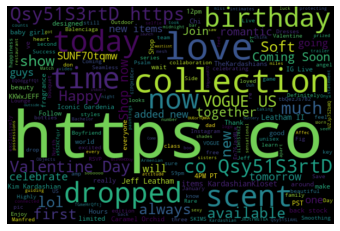

In [ ]:
# Visualizing using the WordCloud
all_words = " ".join( [twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 600, height = 400, random_state = 20, max_font_size = 120 ).generate(all_words)

plt.imshow(wordCloud, interpolation= "bilinear")
plt.axis("off")
plt.show()


In [ ]:
# Creating a function that can compute negative, neutral and positive anlysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Sentiment']= df['Polarity'].apply(getAnalysis)

#updated dataframe
df


,Tweets,Subjectivity,Polarity,Sentiment
0,Just dropped After Hours! Shop now in 13 styl...,0.000000,0.000000,Neutral
1,Happy Birthday boo! Love you 😘,0.800000,0.750000,Positive
2,Thank you for always guiding and protecting al...,0.350000,0.100000,Positive
3,Birthday selfie with my dad! \nWe took this pi...,0.500000,0.000000,Neutral
4,Good luck to everyone taking the bar tomorrow....,0.600000,0.875000,Positive
...,...,...,...,...
95,My birthday baby girl Chi Chi turns 4 today! M...,0.531250,0.250000,Positive
96,Just added new items on my KardashianKloset 🛍 ...,0.454545,0.136364,Positive
97,Just dropped Faux Leather! Available now at h...,0.400000,0.400000,Positive
98,What are some good shows to watch? Could be ne...,0.418182,0.312121,Positive


In [ ]:
#Print positive tweets 

j= 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Sentiment'][i] == 'Positive'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j+i

1) Happy Birthday boo! Love you 😘

2)Thank you for always guiding and protecting all of us. Definitely celebrating you today dad. I miss you soooooo much.

4)Good luck to everyone taking the bar tomorrow. I know you’ve got this!

8)I don’t think so lol https://t.co/TGmeHrQftj

14): COMING SOON: AFTER HOURS. Match your midnight attitude in sexy logo mesh intimates designed to make a statement every night of t…

23) Happy birthday 🎈 ♥️♥️♥️

33): Back In Stock: Soft Lounge Dresses. The sensational Soft Lounge dresses you’ve seen all over your feed are back in stock in Onyx…

45): Kim Kardashian counts North’s paintings as some of her most prized possessions in Vogue’s video series, Objects of Affec…

58)Just dropped  Soft Smoothing Seamless! Shop now at https://t.co/Qsy51S3rtD https://t.co/DUEorTQMmA

73) Happy Birthday beautiful!

90): Coming Soon: Soft Smoothing Seamless—a soft and buttery collection designed for the indoors and outside. Join the waitlist and s…

108)Just dropped  Boyfr

In [ ]:
#Print Negative tweets 

j= 1
sortedDF = df.sort_values(by=['Polarity'], ascending= 'False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Sentiment'][i] == 'Negative'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j+i

1)Duh https://t.co/JmJtrMETsA

6)Anyone that loves the first collection is going to be OBSESSED with the second one https://t.co/JYih8d7O7d

73)long time no sea 🌊 🐚 https://t.co/LtJrwUQ8x7



In [ ]:
#Print Neutral tweets 

j= 1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Sentiment'][i] == 'Neutral'):
    print(str(j) + ')' + sortedDF['Tweets'][i])
    print()
    j = j+i

1)Just dropped  After Hours! Shop now in 13 styles and 5 shades now at https://t.co/Qsy51SlAHL https://t.co/EQ0dggffQ1

1)Birthday selfie with my dad! 
We took this pic on this day celebrating his birthday at the Armenian restaurant in 1998. 
Born on 2.22.44 and today it’s the angel number 2.22.22. I definitely feel the angels all around and feel you all the time. ♾ https://t.co/x95ZXCfqir

4)Who saw The Kardashian’s trailer during The Bachelor????

11)Side-by-side or miles apart sisters are always connected at heart https://t.co/6IPQHlBCer

19)N I T E S W I M 🌒💧🌌 https://t.co/UZJp7SZbMQ

30)Chi &amp; Psalm 💘 https://t.co/iLIH157RtZ

44)💕 https://t.co/BtznKHODoy

60)🖤 https://t.co/7CCbiqahUq

83)Chin up or the crown slips https://t.co/ehUVBveVzT

108)Styled by North https://t.co/DCv1HWbWUK

137)SKIMS in Vogue!!!! https://t.co/4JdsrZRJvX

168)VOGUE US https://t.co/IXDq7UZhzB

201)VOGUE US https://t.co/W307eTZvB8

235)VOGUE US https://t.co/PxwHUz6MRJ

270)VOGUE US https://t.co/RdROe7aQfl

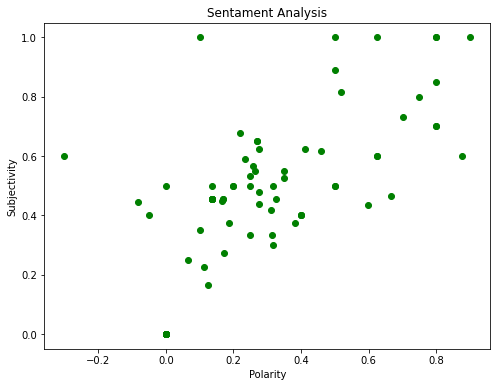

In [ ]:
#Plot 

plt.figure(figsize = (8,6))
for i in range (0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color= 'green')

plt.title('Sentament Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.show()